<a href="https://colab.research.google.com/github/Arombo34/BUILDING-INTELLIGENT-SOFTWARE-SOLUTIONS/blob/main/Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Test Results:



,Username,Expected,Result
0,student,success,Passed
1,wronguser,failure,Passed
2,student,failure,Passed


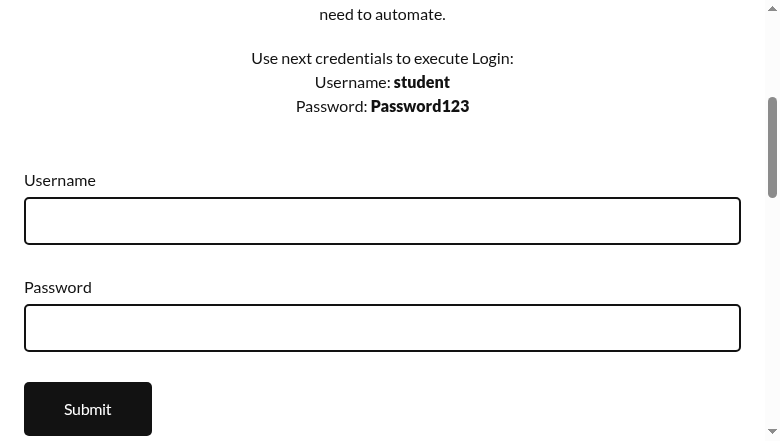

In [20]:
# ✅ Task 2: Automated Login Test using Selenium (AI Testing Simulation)

from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from IPython.display import Image, display
import pandas as pd

# Step 1: Configure headless Chrome (works well in Colab)
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Step 2: Launch browser
driver = webdriver.Chrome(options=chrome_options)
wait = WebDriverWait(driver, 10)

# Step 3: Open a demo login page
driver.get("https://practicetestautomation.com/practice-test-login/")

# Step 4: Define test credentials
test_cases = [
    {"username": "student", "password": "Password123", "expected": "success"},
    {"username": "wronguser", "password": "Password123", "expected": "failure"},
    {"username": "student", "password": "wrongpass", "expected": "failure"},
]

# Step 5: Run tests
results = []
for case in test_cases:
    driver.get("https://practicetestautomation.com/practice-test-login/")
    wait.until(EC.presence_of_element_located((By.ID, "username")))

    driver.find_element(By.ID, "username").clear()
    driver.find_element(By.ID, "password").clear()

    driver.find_element(By.ID, "username").send_keys(case["username"])
    driver.find_element(By.ID, "password").send_keys(case["password"])
    driver.find_element(By.ID, "submit").click()

    time.sleep(2)
    if case["expected"] == "success":
        success = "Logged In Successfully" in driver.page_source
    else:
        success = ("Your username is invalid!" in driver.page_source) or ("Your password is invalid!" in driver.page_source)

    results.append({
        "Username": case["username"],
        "Expected": case["expected"],
        "Result": "Passed" if success else "Failed"
    })

# Step 6: Capture screenshot of final page
driver.save_screenshot("login_test_results.png")

# Step 7: Display test results in a table
df = pd.DataFrame(results)
print("✅ Test Results:\n")
display(df)

# Step 8: Show screenshot
display(Image("login_test_results.png"))

driver.quit()


# ---------------------------------------------------------------------------
#  ANALYSIS
#
# This automated testing task demonstrates the use of Selenium WebDriver to perform
# functional login testing efficiently and accurately. The automation simulates real user
# interactions, such as entering credentials and submitting a form, to test both valid and
# invalid login cases. The results reveal how well the web application handles authentication
# logic and error messages.
#
# Integrating AI into automated testing, through platforms like Testim.io or Selenium IDE
# with AI plugins, significantly enhances test coverage and adaptability. Unlike traditional
# static scripts, AI can intelligently detect and adjust to changes in UI elements, reducing
# test failures caused by updates in the application interface. It can also prioritize test
# cases, identify potential bugs earlier, and suggest optimizations for code paths.
#
# Compared to manual testing, AI-driven testing minimizes human error, improves speed, and
# allows continuous validation across multiple environments. This approach aligns with DevOps
# practices by enabling continuous integration and delivery (CI/CD).
# Overall, the experiment demonstrates how AI-supported automation increases accuracy,
# scalability, and reliability in modern software testing processes.
# ---------------------------------------------------------------------------
